# Машинное обучение, DS-поток
## Задание ML.7


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 30 баллов;

In [ ]:
# Bot check

# HW_ID: ds_ml7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split

from catboost import CatBoostRegressor

from tqdm.notebook import tqdm

---

### Задача 1

Рассмотрим данные из задачи ML.6.2. Задача заключается в сравнении моделей градиентного бустинга из sklearn, для которой категориальные признаки закодированы с помощью
* LabelEncoding,
* MeanEncoding.

Какие признаки будете рассматривать? Какие именно преобразования будете совершать?

In [5]:
houses = pd.read_csv('houses_train.csv')
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3392,20151013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,18295,20151209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,14569,20151209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
3,14081,20160218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,6725,20150627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


К категориальным признакам стоит отнести `zipcode` (почтовые индексы, хоть они и числа, сравнивать бессмысленно). Также стоит отметить порядковые признаки `waterfront`, `view`, `condition`, `grade`.

Выполните базовую предобработку данных из задачи ML.6.2

*Совет.* Используйте код из своего решения предыдущего домашнего задания и/или код с семинаров.

Выполним следующие операции:

- Из даты выделим год. Для цены жилья вряд ли определяющими будет точный месяц/день продажи.
- `bathrooms` разделим на количество полноценных ванных и туалетов, чтобы роль наличия туалетов была видна более явно.
- Для `grade` построим дополнительный признак, где произведём классификацию на плохие, средние и хорошие дома. 
- `zipcode` обработаем согласно выбранному подходу к категориальным признакам.
- Порядковые признаки обработаем с помощью LabelEncoding
- Для того, чтобы обработать географические признаки, следует предварительно исследовать распределение жилья на карте.

In [14]:
houses['year'] = houses['date'].apply(lambda dt: dt[:4]).astype(int)
houses['full_baths'] = houses['bathrooms'].astype(int)
houses['toilets'] = ((houses['bathrooms'] - houses['full_baths']) * 4).astype(int)
houses['class'] = houses['grade'].apply(lambda grade: 3 if grade >= 11 else (2 if grade >= 8 else (1 if grade >= 4 else 0)))

In [15]:
houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,full_baths,toilets,class
0,3392,20151013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2015,1,0,1
1,18295,20151209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,2015,2,1,1
2,14569,20151209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,2015,3,0,1
3,14081,20160218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2016,2,0,2
4,6725,20150627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,0,98003,47.3097,-122.327,2238,6819,2015,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15621,20922,20160126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,0,98144,47.5699,-122.288,1400,1230,2016,2,0,2
15622,13963,20151014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,0,98056,47.5137,-122.167,2520,6023,2015,2,2,2
15623,9850,20150521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,98103,47.6993,-122.346,1530,1509,2015,2,2,2
15624,13975,20160223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,98146,47.5107,-122.362,1830,7200,2016,2,2,2


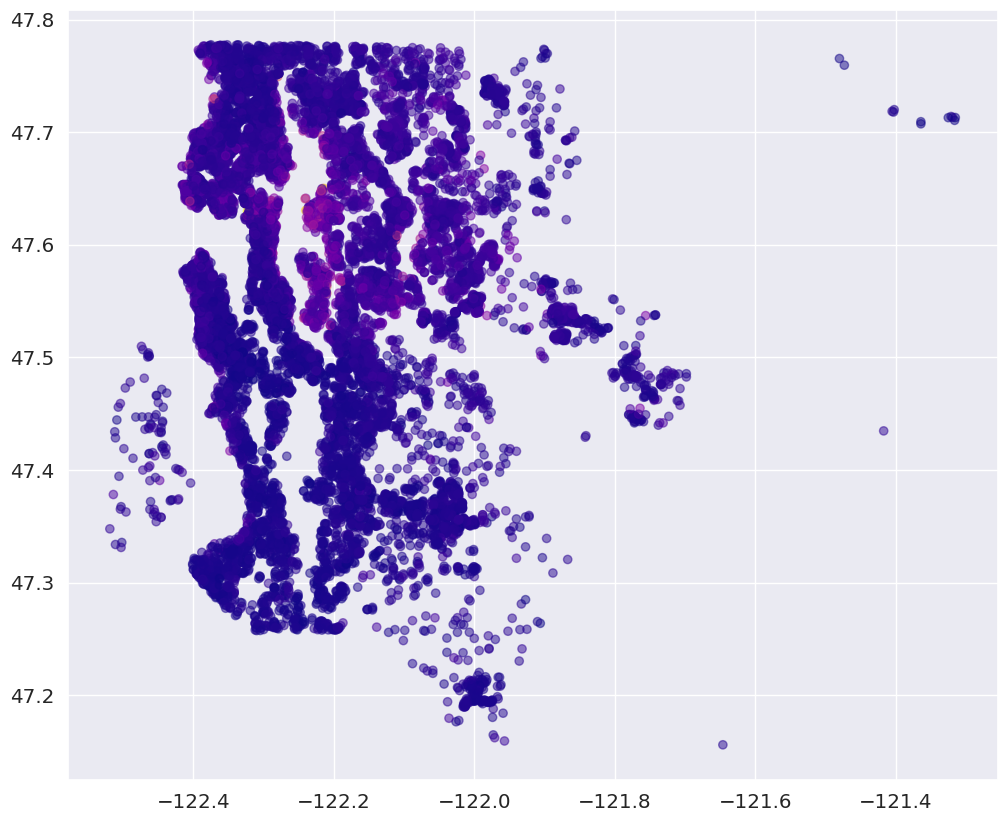

In [25]:
plt.figure(figsize=(12, 10))
plt.scatter(houses['long'], houses['lat'], alpha=0.5, c=houses['price'], cmap='plasma')

Выделить отдельные районы представляется сложной и в целом бессмысленной задачей - цена в целом мало зависит от положения.

Выполните обработку категориальных признаков

In [32]:
df1 = houses.copy()
df2 = houses.copy()

enc1 = LabelEncoder()
df1['zipcode_encoded'] = enc1.fit_transform(df1['zipcode'])

Для MeanEncoding разумно попробовать вычислить среднее цен и количество домов по каждому индексу

In [33]:
means = df2.groupby(['zipcode'])['price'].mean()
counts = df2.groupby(['zipcode'])['price'].count()

df2['price_mean'] = df2['zipcode'].map(means)
df2['price_count'] = df2['zipcode'].map(counts)

Обучите модели и постройте зависимость значения MAPE от количества деревьев и их максимальной глубины.

In [34]:
df1 = df1[['year', 'price', 'bedrooms', 'full_baths', 'toilets', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'class', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode_encoded', 'sqft_living15', 'sqft_lot15']]
df2 = df2[['year', 'price', 'bedrooms', 'full_baths', 'toilets', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'class', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'price_mean', 'price_count', 'sqft_living15', 'sqft_lot15']]

In [37]:
X = df1[['year', 'bedrooms', 'full_baths', 'toilets', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'class', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode_encoded', 'sqft_living15', 'sqft_lot15']]
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
mape_label_depth = []
for depth in tqdm(np.arange(3, 16)):
    model = CatBoostRegressor(max_depth=depth, n_estimators=80, silent=True)
    model.fit(X_train, y_train)
    mape_label_depth.append(mape(y_test, model.predict(X_test)))

  0%|          | 0/13 [00:00<?, ?it/s]

In [43]:
mape_label_num_trees = []
for n_trees in tqdm(np.arange(1, 252, 25)):
    model = CatBoostRegressor(n_estimators=n_trees, silent=True)
    model.fit(X_train, y_train)
    mape_label_num_trees.append(mape(y_test, model.predict(X_test)))

  0%|          | 0/11 [00:00<?, ?it/s]

In [44]:
X = df2[['year', 'bedrooms', 'full_baths', 'toilets', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'class', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'price_mean', 'price_count', 'sqft_living15', 'sqft_lot15']]
y = df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
mape_mean_depth = []
for depth in tqdm(np.arange(3, 16)):
    model = CatBoostRegressor(max_depth=depth, n_estimators=80, silent=True)
    model.fit(X_train, y_train)
    mape_mean_depth.append(mape(y_test, model.predict(X_test)))

  0%|          | 0/13 [00:00<?, ?it/s]

In [46]:
mape_mean_num_trees = []
for n_trees in tqdm(np.arange(1, 252, 25)):
    model = CatBoostRegressor(n_estimators=n_trees, silent=True)
    model.fit(X_train, y_train)
    mape_mean_num_trees.append(mape(y_test, model.predict(X_test)))

  0%|          | 0/11 [00:00<?, ?it/s]

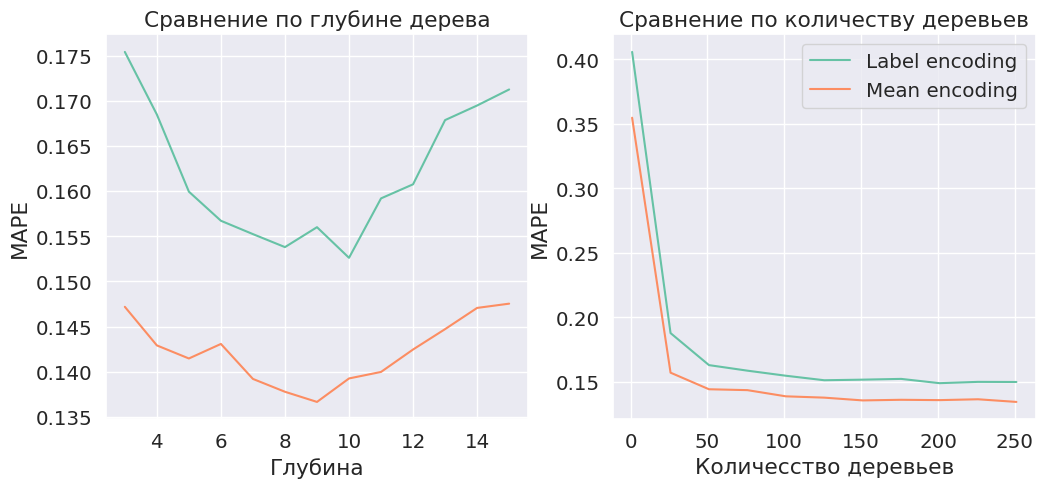

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(np.arange(3, 16), mape_label_depth, label='Label encoding')
ax[0].plot(np.arange(3, 16), mape_mean_depth, label='Mean encoding')
ax[0].set_xlabel('Глубина')
ax[0].set_ylabel('MAPE')
ax[0].set_title('Сравнение по глубине дерева')

ax[1].plot(np.arange(1, 252, 25), mape_label_num_trees, label='Label encoding')
ax[1].plot(np.arange(1, 252, 25), mape_mean_num_trees, label='Mean encoding')
ax[1].set_xlabel('Количесство деревьев')
ax[1].set_ylabel('MAPE')
ax[1].set_title('Сравнение по количеству деревьев')

ax[1].legend()

plt.show()

**Выводы:** Вне зависимости от гиперпараметров модели mean encoding даёт результаты существенно лучше label encoding. Вместо с тем можно отметить, что оптимальные гиперпараметры не зависят от способа обработки категориальных признаков и составляют `max_depth = 9`, `n_estimators = 50`